In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from dataset import get_data_loaders, CrossValidationMode

In [2]:
# Initialize data loaders
data_dir = "data"  # Update this path to your actual data directory
train_loader, val_loader = get_data_loaders(
    data_dir=data_dir,
    window_size=64,     # You can adjust these parameters
    window_step=16,
    sequence_length=5,
    cross_val_mode=CrossValidationMode.TOP,
    batch_size=1,       # Set to 1 to see individual samples
    num_workers=0       # Set to 0 for easier debugging in notebook
)

Found 100 frame files and 100 label files
Loaded 100 frames and 100 labels
Found 100 frame files and 100 label files
Loaded 100 frames and 100 labels


In [3]:
print(f"Training dataset size: {len(train_loader.dataset)}")
print(f"Validation dataset size: {len(val_loader.dataset)}")

Training dataset size: 288120
Validation dataset size: 96040


In [4]:
def display_samples(loader, num_samples=10, title="Samples"):
    samples = []
    
    print(f"\n{title}:")
    for i, (data, target) in enumerate(loader):
        if i >= num_samples:
            break
            
        # Print shapes
        print(f"Sample {i+1}:")
        print(f"  Input shape: {data.shape}")
        print(f"  Target shape: {target.shape}")
        print(f"  Sequence length: {data.shape[1]}")
        print(f"  Input min/max: {data.min().item():.2f}/{data.max().item():.2f}")
        print(f"  Target unique values: {torch.unique(target).tolist()}")
        
        # Store sample for visualization
        samples.append((data, target))
    
    return samples

In [5]:
train_samples = display_samples(train_loader, title="Training Samples")


Training Samples:
Sample 1:
  Input shape: torch.Size([1, 4, 64, 64])
  Target shape: torch.Size([1, 64, 64])
  Sequence length: 4
  Input min/max: 0.00/1.00
  Target unique values: [0, 255]
Sample 2:
  Input shape: torch.Size([1, 1, 64, 64])
  Target shape: torch.Size([1, 64, 64])
  Sequence length: 1
  Input min/max: 0.00/1.00
  Target unique values: [0]
Sample 3:
  Input shape: torch.Size([1, 3, 64, 64])
  Target shape: torch.Size([1, 64, 64])
  Sequence length: 3
  Input min/max: 0.00/1.00
  Target unique values: [0, 255]
Sample 4:
  Input shape: torch.Size([1, 5, 64, 64])
  Target shape: torch.Size([1, 64, 64])
  Sequence length: 5
  Input min/max: 0.00/1.00
  Target unique values: [0]
Sample 5:
  Input shape: torch.Size([1, 2, 64, 64])
  Target shape: torch.Size([1, 64, 64])
  Sequence length: 2
  Input min/max: 0.00/1.00
  Target unique values: [0, 255]
Sample 6:
  Input shape: torch.Size([1, 3, 64, 64])
  Target shape: torch.Size([1, 64, 64])
  Sequence length: 3
  Input min/m

In [6]:
val_samples = display_samples(val_loader, title="Validation Samples")


Validation Samples:
Sample 1:
  Input shape: torch.Size([1, 1, 64, 64])
  Target shape: torch.Size([1, 64, 64])
  Sequence length: 1
  Input min/max: 0.00/1.00
  Target unique values: [0]
Sample 2:
  Input shape: torch.Size([1, 1, 64, 64])
  Target shape: torch.Size([1, 64, 64])
  Sequence length: 1
  Input min/max: 0.00/1.00
  Target unique values: [0]
Sample 3:
  Input shape: torch.Size([1, 1, 64, 64])
  Target shape: torch.Size([1, 64, 64])
  Sequence length: 1
  Input min/max: 0.00/1.00
  Target unique values: [0]
Sample 4:
  Input shape: torch.Size([1, 1, 64, 64])
  Target shape: torch.Size([1, 64, 64])
  Sequence length: 1
  Input min/max: 0.00/1.00
  Target unique values: [0]
Sample 5:
  Input shape: torch.Size([1, 1, 64, 64])
  Target shape: torch.Size([1, 64, 64])
  Sequence length: 1
  Input min/max: 0.00/1.00
  Target unique values: [0, 255]
Sample 6:
  Input shape: torch.Size([1, 1, 64, 64])
  Target shape: torch.Size([1, 64, 64])
  Sequence length: 1
  Input min/max: 0.00

In [27]:
# Visualize a few samples (optional)
def visualize_sample(sample_idx=0):
    data, target = train_samples[sample_idx]
    seq_len = data.shape[1]
    
    # Handle different sequence lengths
    if seq_len == 1:
        # For sequence length 1, use a simpler layout
        fig, axes = plt.subplots(2, 1, figsize=(4, 8))
        
        # Plot the single frame
        axes[0].imshow(data[0, 0].numpy(), cmap='gray')
        axes[0].set_title("Frame 1")
        axes[0].axis('off')
        
        # Plot the target
        im = axes[1].imshow(target[0].numpy(), cmap='viridis')
        axes[1].set_title("Target Label")
        axes[1].axis('off')

    else:
        # For sequence length > 1, use the original layout
        fig, axes = plt.subplots(2, seq_len, figsize=(4*seq_len, 8))
        
        # Plot each frame in the sequence
        for i in range(seq_len):
            axes[0, i].imshow(data[0, i].numpy(), cmap='gray')
            axes[0, i].set_title(f"Frame {i+1}")
            axes[0, i].axis('off')
        
        # Plot the target
        center_idx = seq_len//2
        im = axes[1, center_idx].imshow(target[0].numpy(), cmap='viridis')
        axes[1, center_idx].set_title("Target Label")
        axes[1, center_idx].axis('off')
        
        # Hide unused axes
        for i in range(seq_len):
            if i != center_idx:
                axes[1, i].axis('off')
    
    plt.tight_layout()
    plt.show()

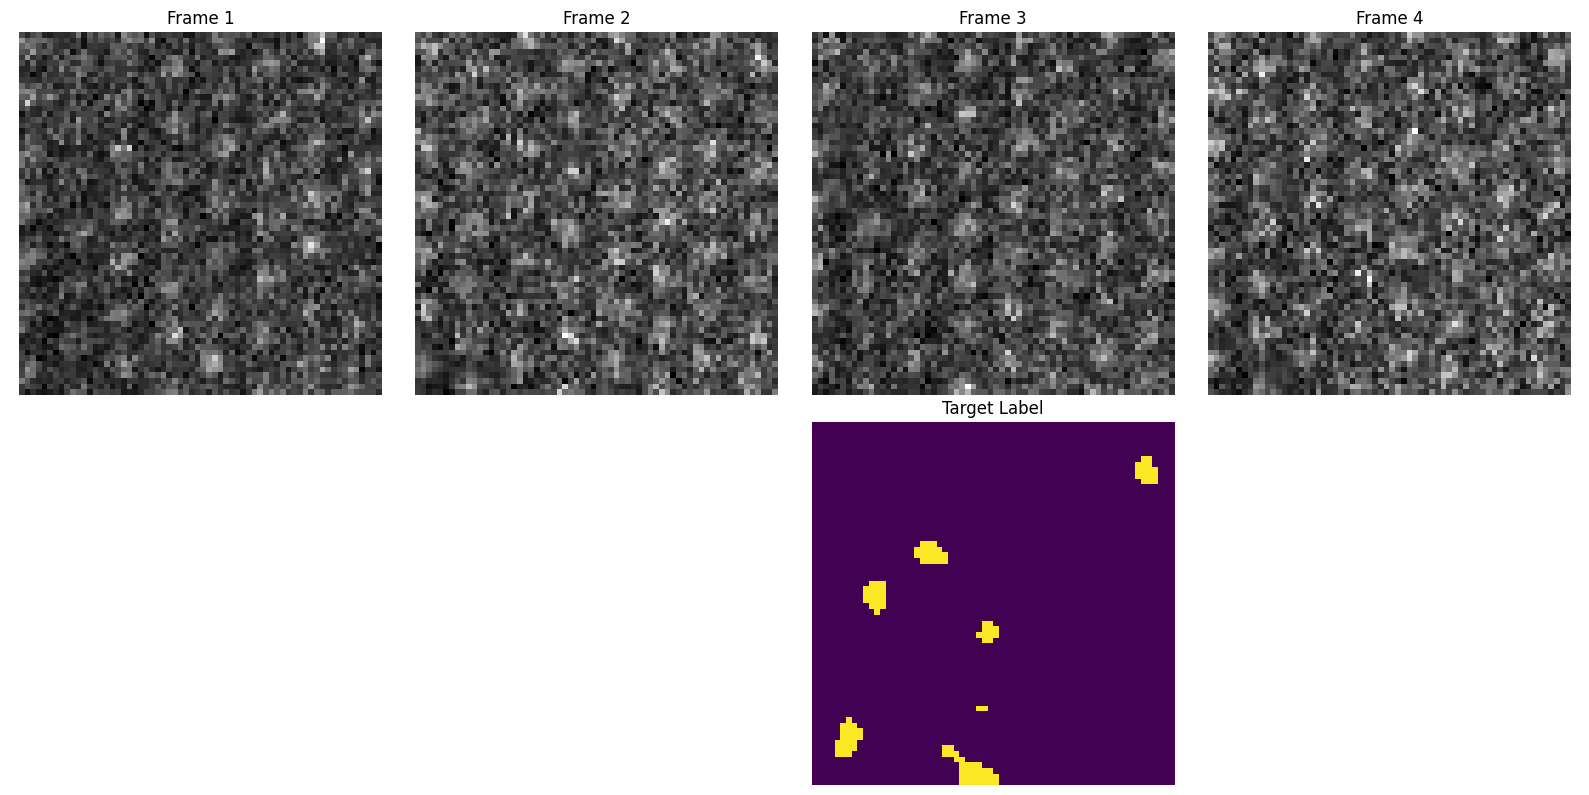

In [28]:
visualize_sample(0)

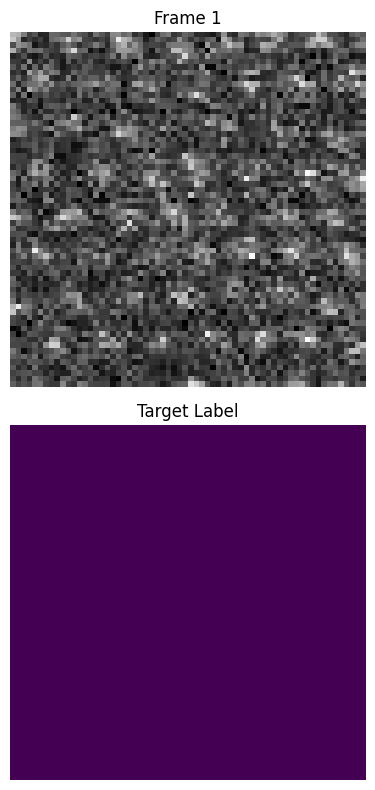

In [29]:
visualize_sample(1)

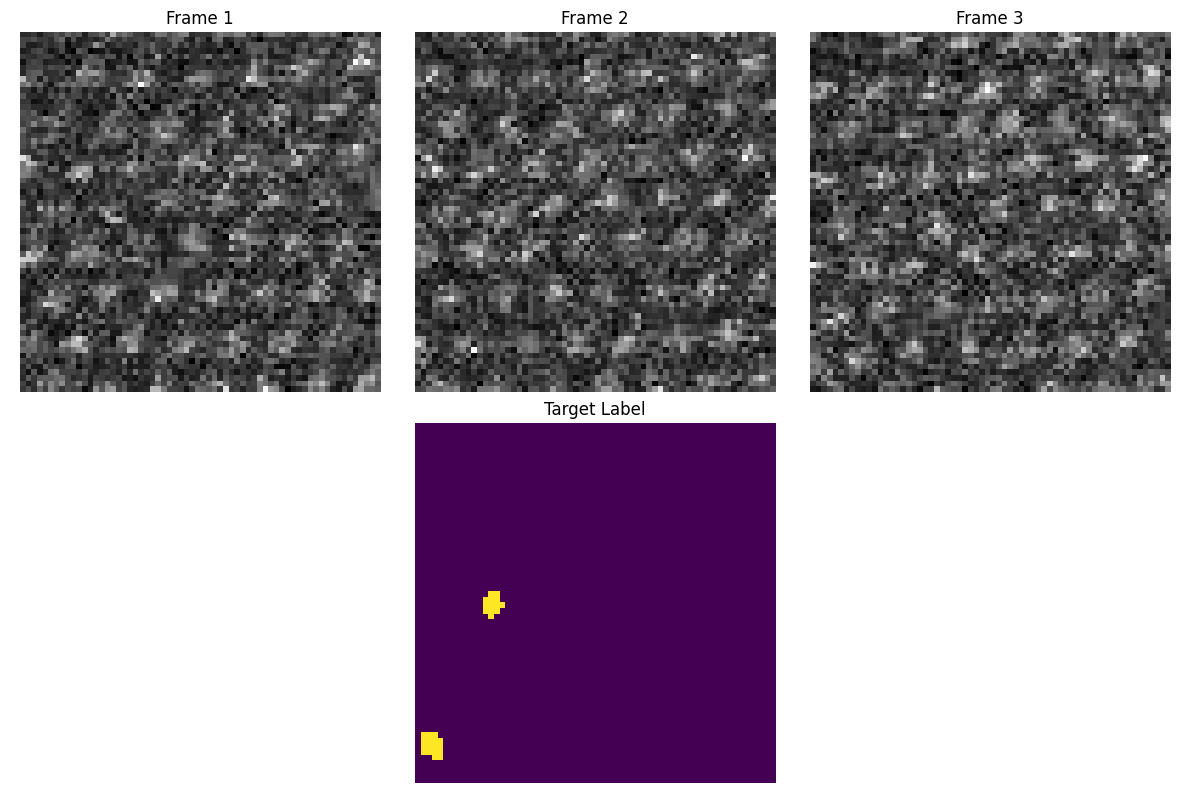

In [22]:
visualize_sample(2)

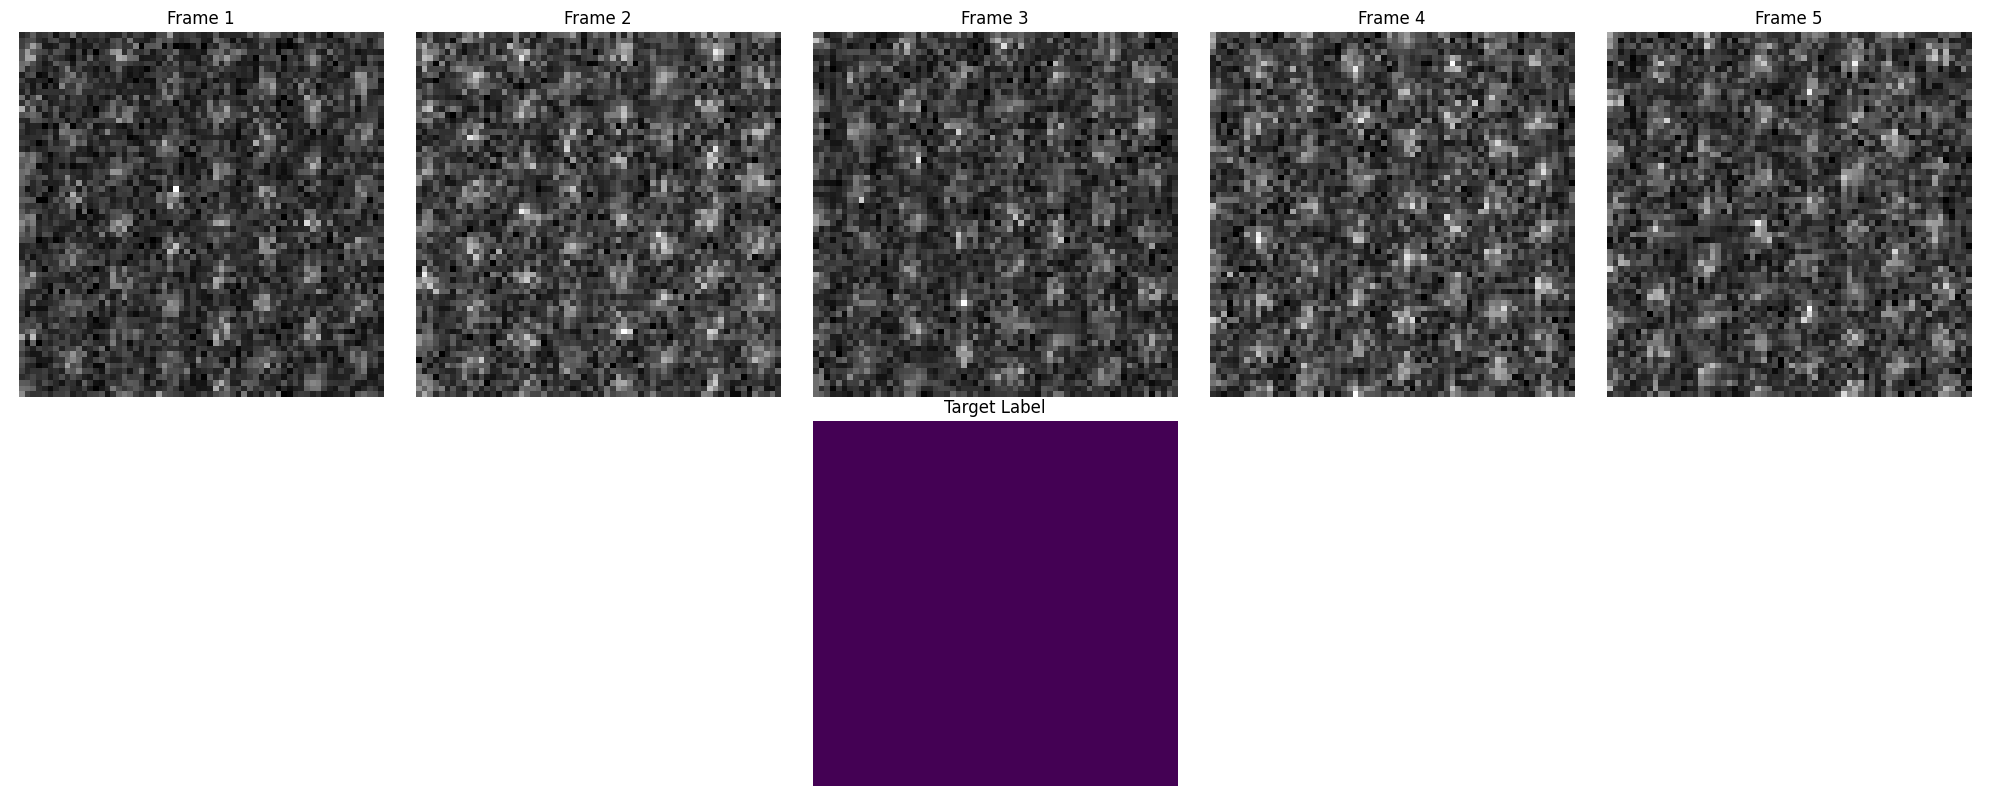

In [23]:
visualize_sample(3)

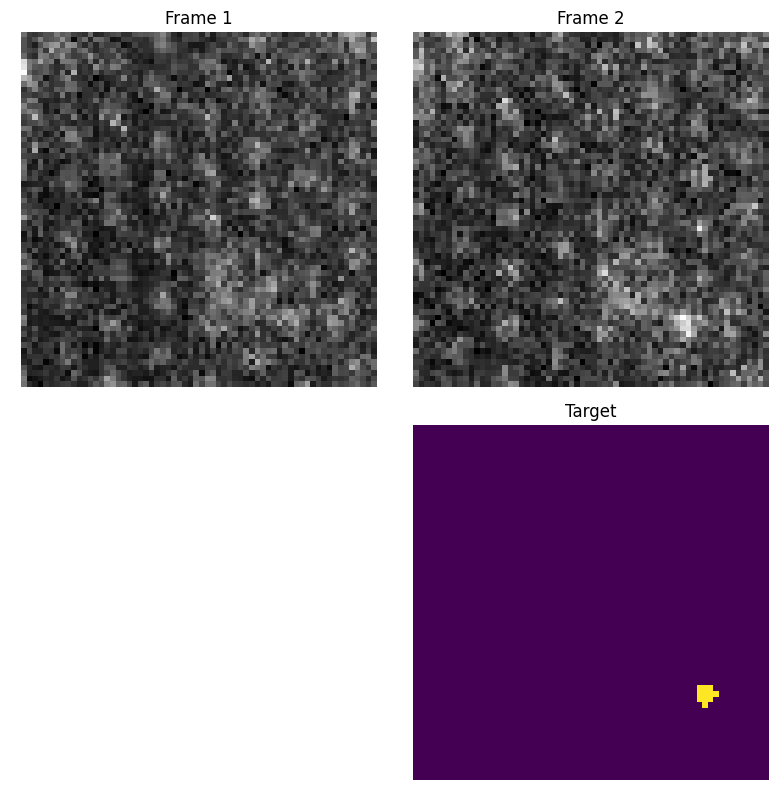

In [12]:
visualize_sample(4)